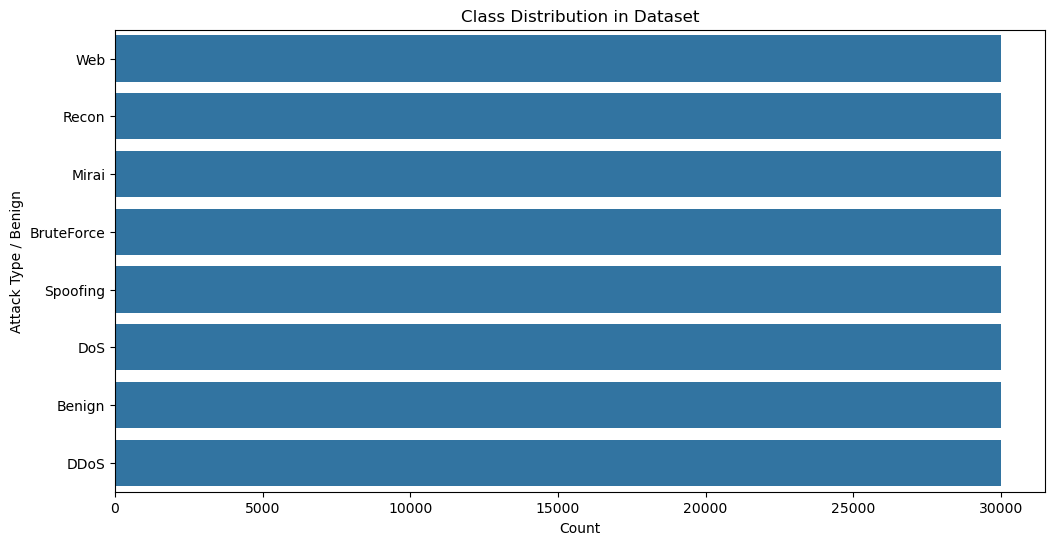

Training set shape: (216000, 46), (216000,)
Testing set shape: (24000, 46), (24000,)

Real-time anomaly detection simulation started...

Row 1: True -> Benign, Predicted -> Benign
Row 2: True -> BruteForce, Predicted -> BruteForce
Row 3: True -> Benign, Predicted -> Benign
Row 4: True -> Recon, Predicted -> Recon
Row 5: True -> Spoofing, Predicted -> Recon
Row 6: True -> Mirai, Predicted -> Mirai
Row 7: True -> Web, Predicted -> Web
Row 8: True -> Web, Predicted -> Web
Row 9: True -> Spoofing, Predicted -> Spoofing
Row 10: True -> DoS, Predicted -> DoS
Row 11: True -> BruteForce, Predicted -> BruteForce
Row 12: True -> Web, Predicted -> Web
Row 13: True -> Benign, Predicted -> Benign
Row 14: True -> BruteForce, Predicted -> BruteForce
Row 15: True -> Benign, Predicted -> Benign
Row 16: True -> Spoofing, Predicted -> Spoofing
Row 17: True -> Spoofing, Predicted -> Spoofing
Row 18: True -> BruteForce, Predicted -> Web
Row 19: True -> Spoofing, Predicted -> Spoofing
Row 20: True -> Benign

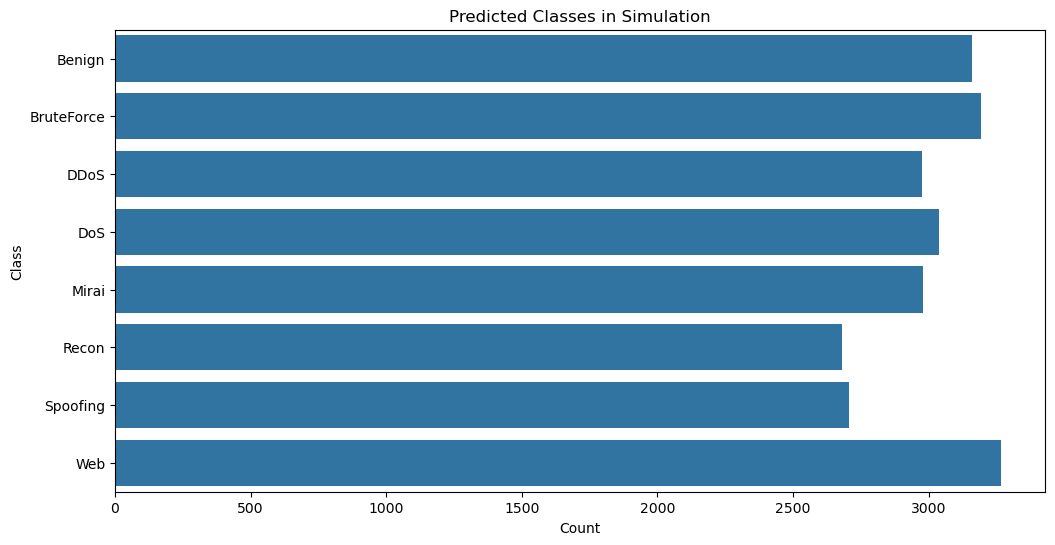

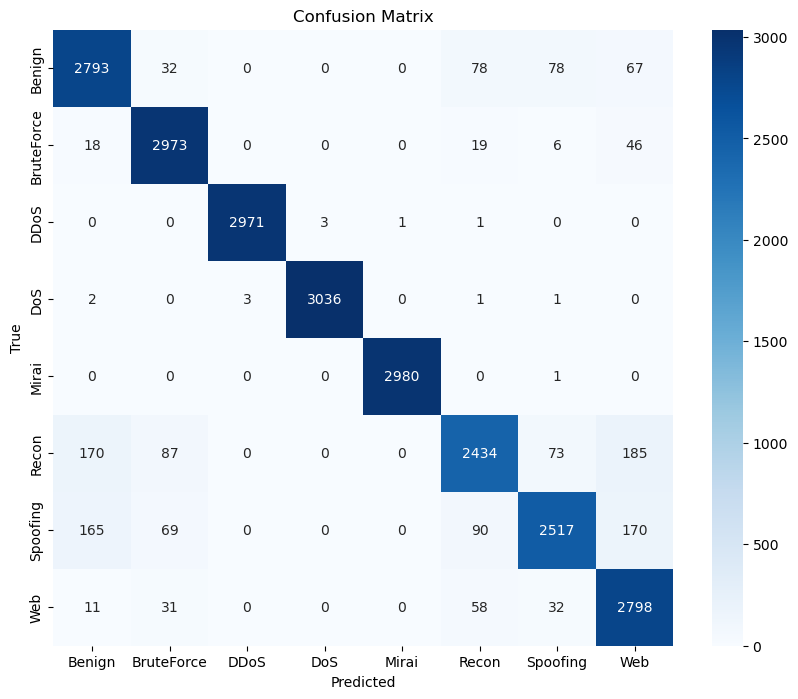

Simulation Accuracy: 93.76%

Classification Report:

              precision    recall  f1-score   support

      Benign       0.88      0.92      0.90      3048
  BruteForce       0.93      0.97      0.95      3062
        DDoS       1.00      1.00      1.00      2976
         DoS       1.00      1.00      1.00      3043
       Mirai       1.00      1.00      1.00      2981
       Recon       0.91      0.83      0.86      2949
    Spoofing       0.93      0.84      0.88      3011
         Web       0.86      0.95      0.90      2930

    accuracy                           0.94     24000
   macro avg       0.94      0.94      0.94     24000
weighted avg       0.94      0.94      0.94     24000



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
data = pd.read_csv('/Users/bodapati/Downloads/balanced_dataset3.csv')

# Features and target
features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
            'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
            'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
            'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP',
            'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT',
            'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
target = 'label'

# Plot dataset class distribution
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index)
plt.title("Class Distribution in Dataset")
plt.xlabel("Count")
plt.ylabel("Attack Type / Benign")
plt.show()

# Encode target labels
le = LabelEncoder()
data[target] = le.fit_transform(data[target])

# Features and labels
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Print train and test shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}\n")

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

print("Real-time anomaly detection simulation started...\n")

# For plotting real-time predictions
predicted_labels = []
true_labels = []

# Simulate real-time row-by-row prediction
for i in range(len(X_test)):
    row = X_test.iloc[i].values.reshape(1, -1)
    prediction = clf.predict(row)
    predicted_label = le.inverse_transform(prediction)[0]
    true_label = le.inverse_transform([y_test.iloc[i]])[0]
    
    predicted_labels.append(predicted_label)
    true_labels.append(true_label)
    
    print(f"Row {i+1}: True -> {true_label}, Predicted -> {predicted_label}")

print("\nSimulation finished.\n")

# Plot predicted vs true counts
plt.figure(figsize=(12,6))
sns.countplot(y=predicted_labels, order=np.unique(predicted_labels))
plt.title("Predicted Classes in Simulation")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Simulation Accuracy: {accuracy*100:.2f}%\n")

# Classification report (precision, recall, F1-score)
report = classification_report(true_labels, predicted_labels, target_names=np.unique(true_labels))
print("Classification Report:\n")
print(report)